In [95]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [127]:
train=pd.read_csv('titanic_train.csv')

In [128]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

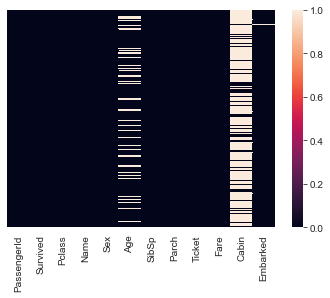

In [100]:
sns.heatmap(train.isnull(),yticklabels=False)

In [19]:
#20 percent od age data is missing


<AxesSubplot:xlabel='Survived', ylabel='count'>

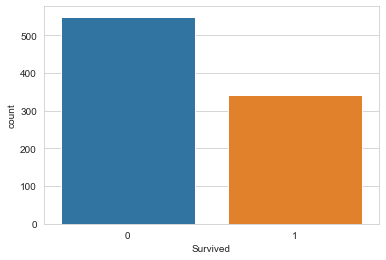

In [101]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

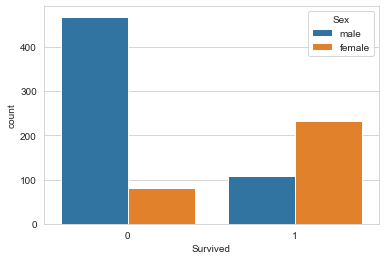

In [102]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

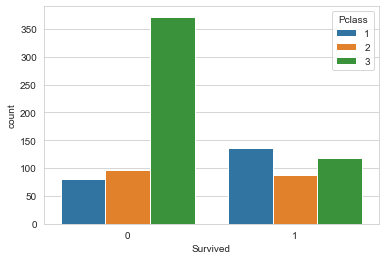

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\GAURAV\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

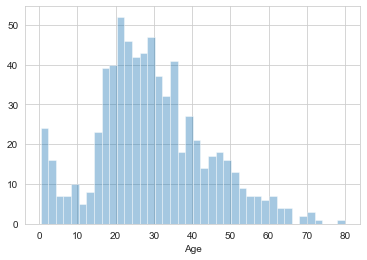

In [33]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

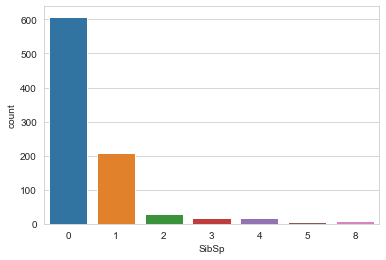

In [34]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

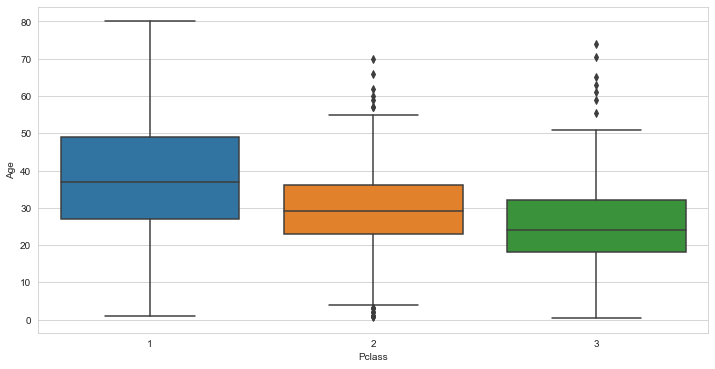

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data= train)

In [104]:
def impute_age(cols):
    Age =cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [139]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

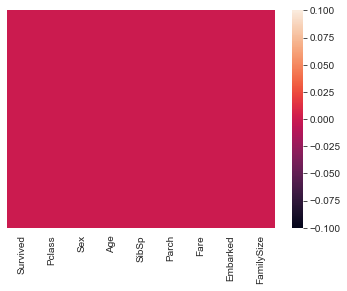

In [196]:
sns.heatmap(train.isnull(),yticklabels=False)

In [131]:
train.drop('Cabin',axis=1,inplace=True)

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [113]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [135]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [136]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [141]:
train.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
FamilySize    0
dtype: int64

In [197]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])

In [198]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


In [55]:
#train=pd.concat([train,sex,Embark],axis=1)

In [145]:
#train.head()

<AxesSubplot:>

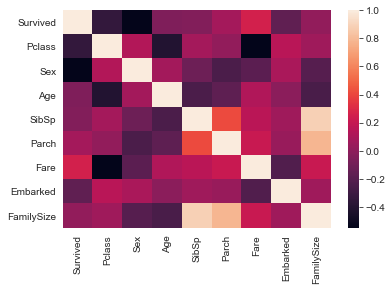

In [146]:
sns.heatmap(train.corr())

In [147]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,-0.163517,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,0.157112,0.065997
Sex,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,0.104057,-0.200988
Age,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,-0.006734,-0.251918
SibSp,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,0.066654,0.890712
Parch,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,0.038322,0.783111
Fare,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,-0.221226,0.217138
Embarked,-0.163517,0.157112,0.104057,-0.006734,0.066654,0.038322,-0.221226,1.000000,0.064701
FamilySize,0.016639,0.065997,-0.200988,-0.251918,0.890712,0.783111,0.217138,0.064701,1.000000


In [231]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [176]:
X_train, X_test,y_train,y_test =train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=.30,random_state=42)

In [250]:
from sklearn.linear_model import LogisticRegression

In [266]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [267]:
#param_grid = {
   # 'penalty': ['l1', 'l2'],
   # 'C': [0.001, 0.01, 0.1, 1, 10, 100],
   # 'solver': ['liblinear', 'saga']
#}


In [269]:

#grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
#grid_search.fit(X_train_scaled, y_train)
#best_params = grid_search.best_params_
#model1=LogisticRegression(max_iter=2000,**best_params)
model1=LogisticRegression(max_iter=2000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [270]:
predictions=model1.predict(X_test)

In [271]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [272]:
from sklearn.metrics import confusion_matrix

In [273]:
accuracy=confusion_matrix(y_test,predictions)

In [274]:
accuracy

array([[137,  20],
       [ 30,  81]], dtype=int64)

In [243]:
from sklearn.metrics import accuracy_score

In [244]:
accuracy=accuracy_score(y_test,predictions)

In [245]:
accuracy

0.8134328358208955

In [275]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="gini")  
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=10)

In [188]:
y_pred= classifier.predict(X_test)

In [163]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [189]:
accuracy2=accuracy_score(y_test,y_pred)

In [190]:
accuracy2

0.7686567164179104

In [202]:
from sklearn.ensemble import RandomForestClassifier  
classifier2= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier2.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [192]:
y_pred2= classifier2.predict(X_test)

In [194]:
accuracy3=accuracy_score(y_test,y_pred2)

In [208]:
accuracy3

0.7611940298507462

In [203]:
pip install xgboost

In [204]:
import xgboost as xgb

In [224]:
from sklearn.metrics import accuracy_score, classification_report

In [228]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [230]:
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_

In [226]:
y_pred3 = model.predict(X_test)
accuracy4= accuracy_score(y_test, y_pred3)
classification_report = classification_report(y_test, y_pred3)

print("\nModel Evaluation:")
print("Accuracy:", accuracy4)
print("Classification Report:")
print(classification_report)


Model Evaluation:
Accuracy: 0.7947761194029851
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [227]:
accuracy4

0.7947761194029851